### Logistic Regression On Employee Attrition


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing the required libraries

In [22]:
df = pd.read_csv("data_employee.csv")
# reading the dataset

In [23]:
print(df.dtypes)

df_ncat = df.select_dtypes(include = ["int64"])

df_cat = df.select_dtypes(exclude = ["int64"])


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Find out the different types of data types the data set contains. Dividing the dataset into categorical and non categorical variables for easier analysis.

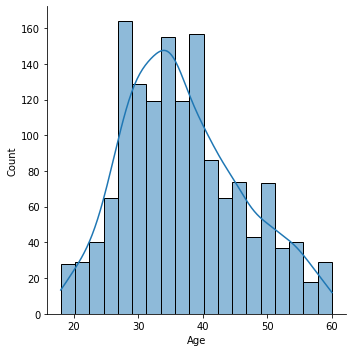

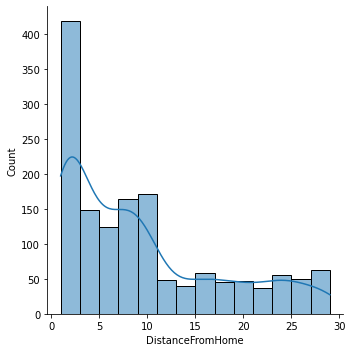

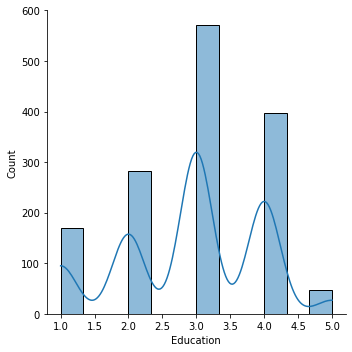

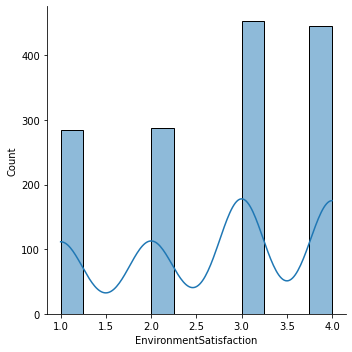

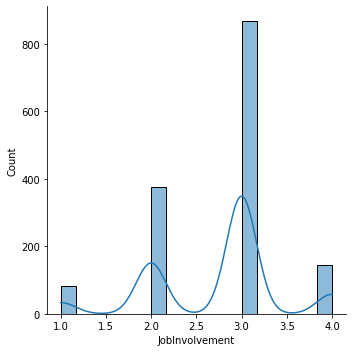

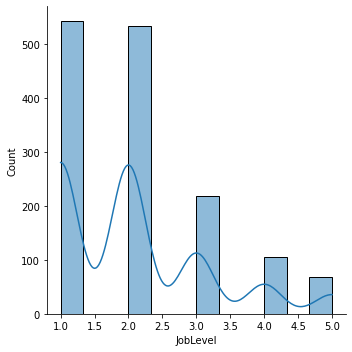

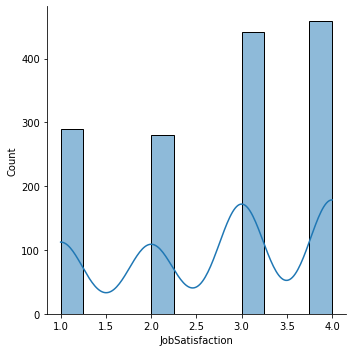

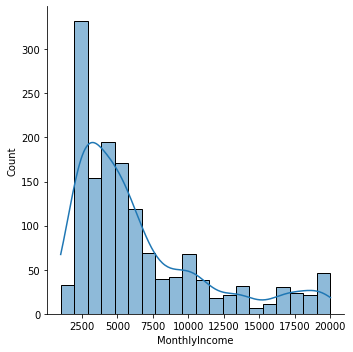

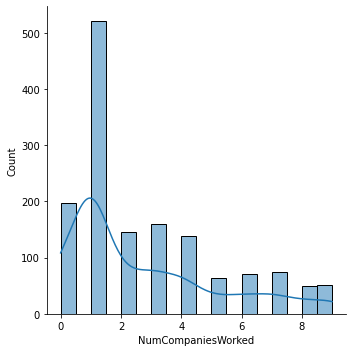

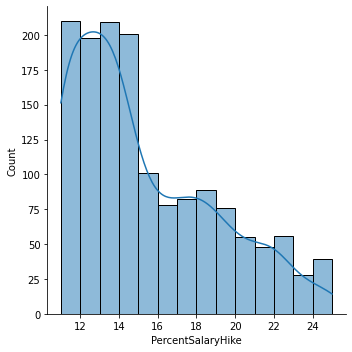

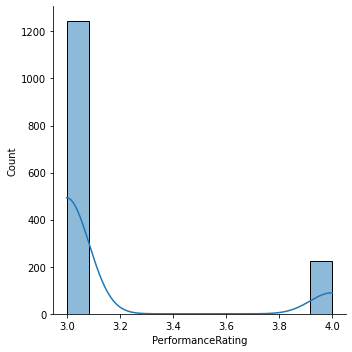

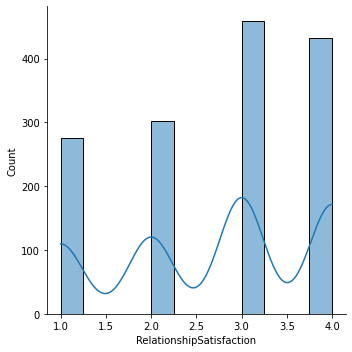

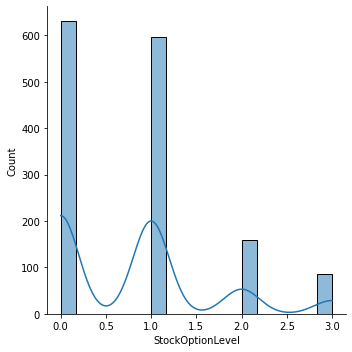

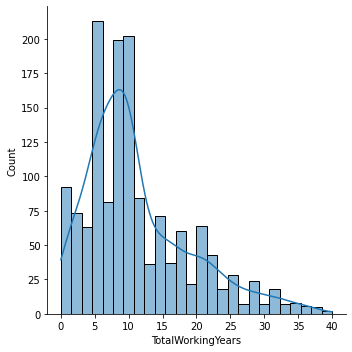

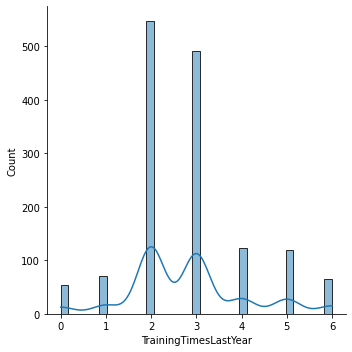

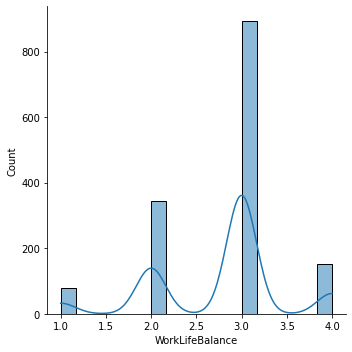

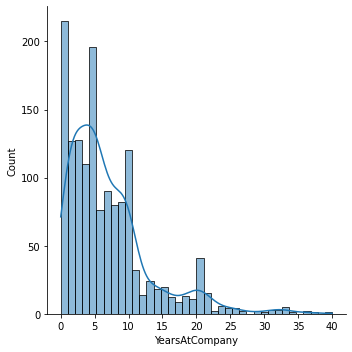

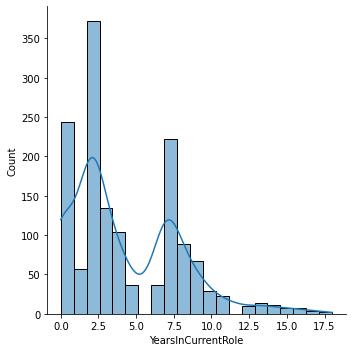

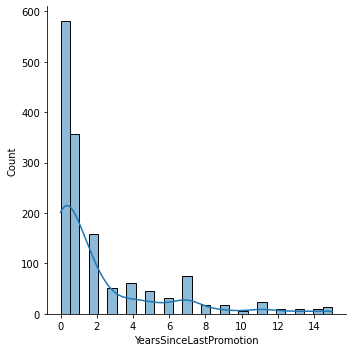

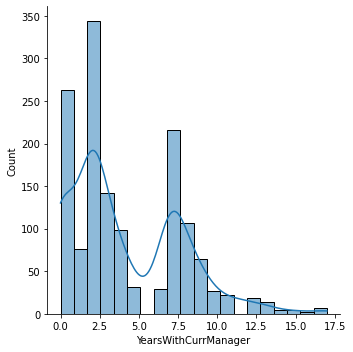

In [5]:
df_ncat = df_ncat.drop(["DailyRate", "EmployeeCount", "EmployeeNumber", "HourlyRate", "MonthlyRate", "StandardHours"], axis = 1)

for i in df_ncat.columns:
    sns.displot(data = df_ncat, x = df_ncat[i], kde=True)

#### Based on the analysis of the non categorical variables some of the variables are dropped as they were not required for the regression.Few of the variable that were dropped are EmployeeCount, EmployeeNumber, HourlyRate, etc.

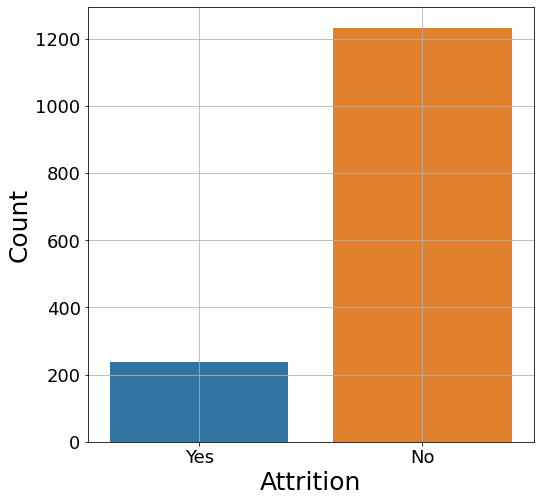

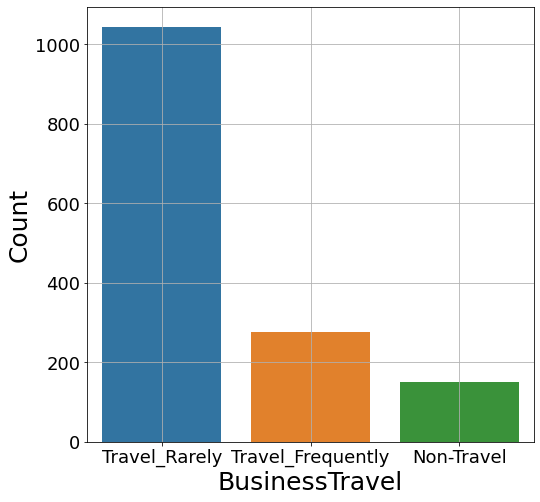

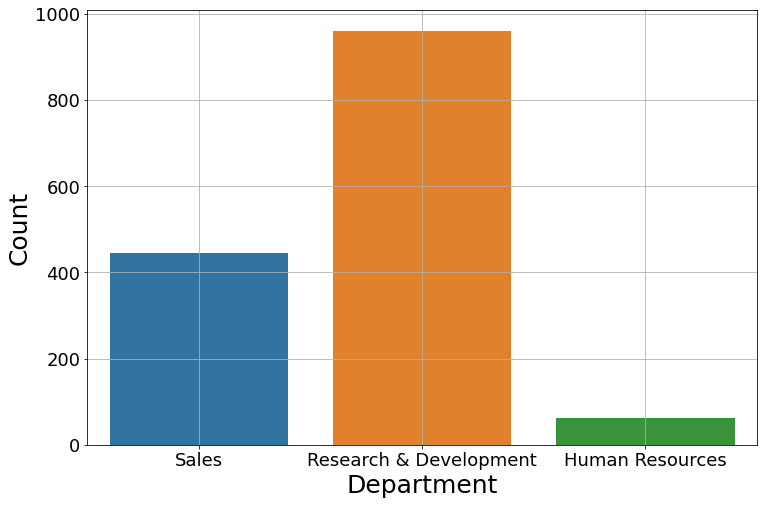

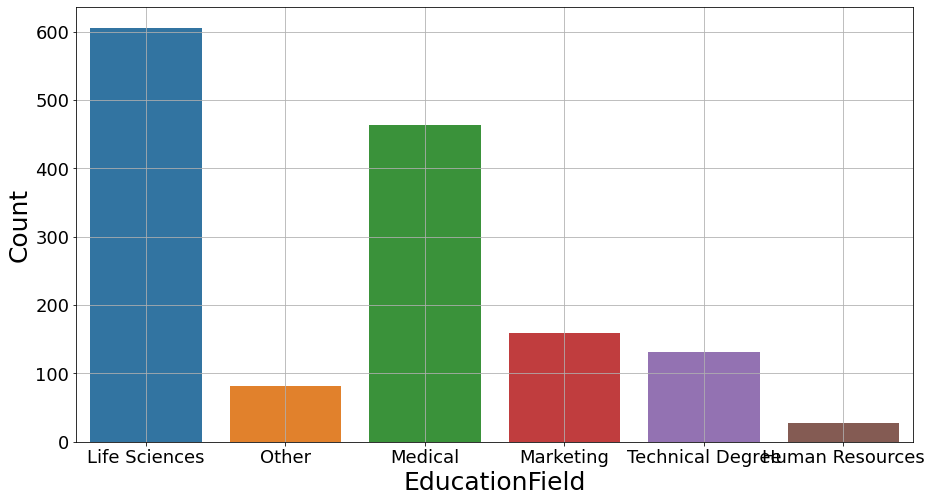

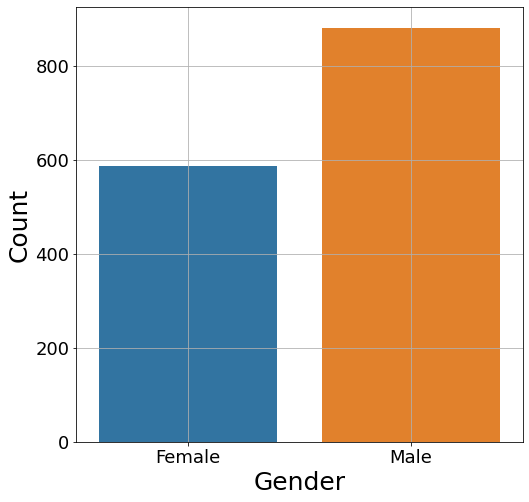

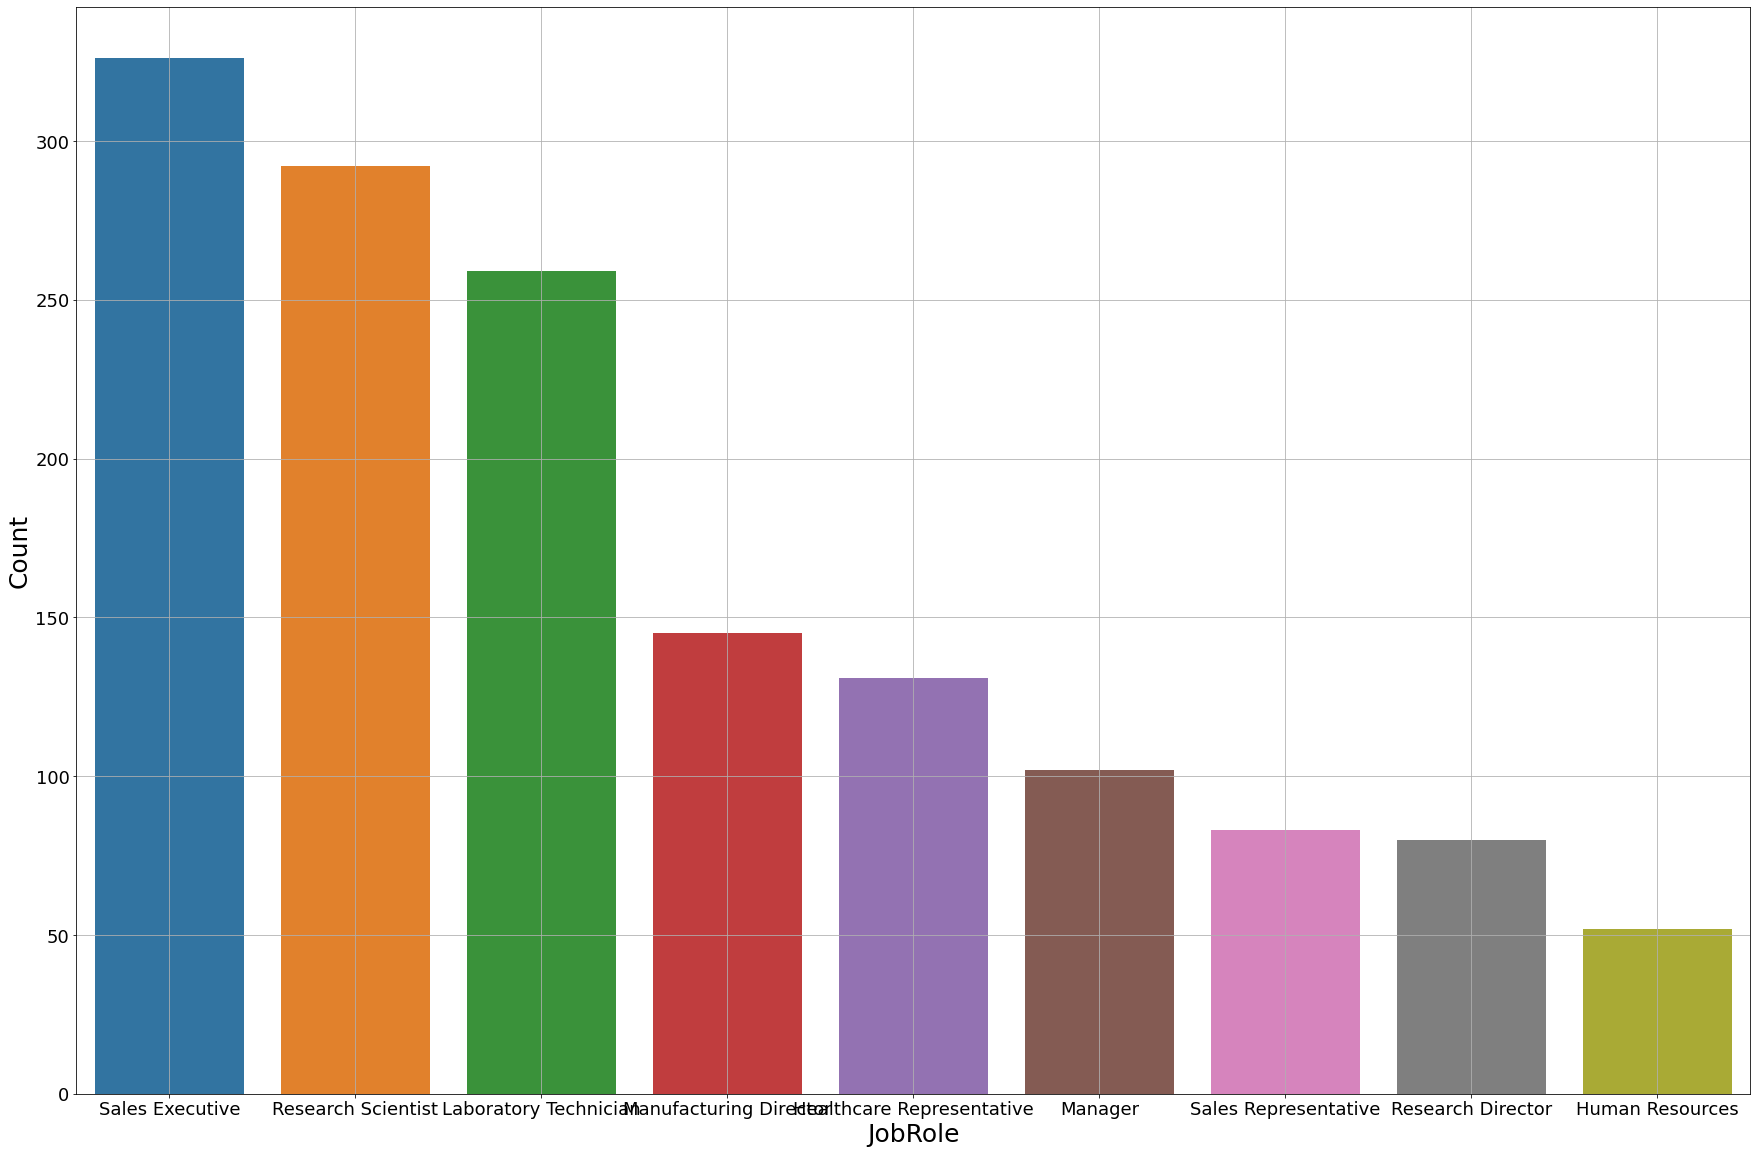

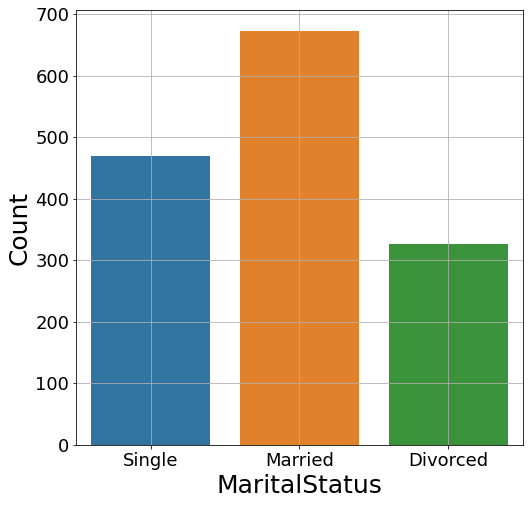

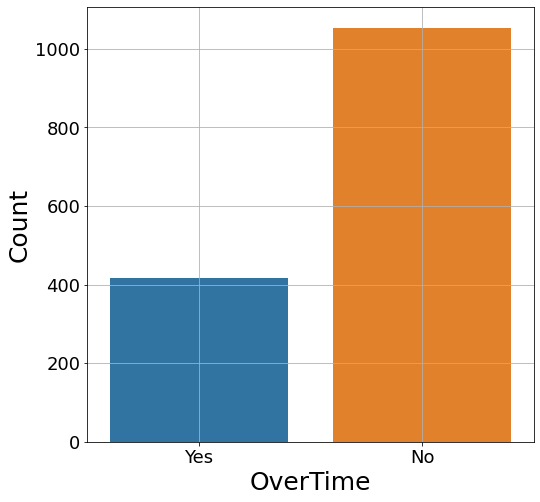

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [6]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "Attrition", data = df_cat)
plt.grid(True)
plt.xlabel("Attrition", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "BusinessTravel", data = df_cat)
plt.grid(True)
plt.xlabel("BusinessTravel", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (12,8))
ax = sns.countplot(x = "Department", data = df_cat)
plt.grid(True)
plt.xlabel("Department", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (15,8))
ax = sns.countplot(x = "EducationField", data = df_cat)
plt.grid(True)
plt.xlabel("EducationField", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "Gender", data = df_cat)
plt.grid(True)
plt.xlabel("Gender", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (30,20))
ax = sns.countplot(x = "JobRole", data = df_cat)
plt.grid(True)
plt.xlabel("JobRole", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "MaritalStatus", data = df_cat)
plt.grid(True)
plt.xlabel("MaritalStatus", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

params = {'axes.titlesize':'25',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)
plt.figure(figsize = (8,8))
ax = sns.countplot(x = "OverTime", data = df_cat)
plt.grid(True)
plt.xlabel("OverTime", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.show()

df_cat.head()

#### Based on the plots and analysis one of the categorical variables was dropped as it made no much of a difference to the dataset. The variable Over18 was removed from the categorical variables.

#### The following few cells show how the categorical values are converted to numerical values for building an accurate model.


In [7]:
df_cat.loc[df_cat["Attrition"] == "Yes", "Attrition"] = 1
df_cat.loc[df_cat["Attrition"] == "No", "Attrition"] = 0


df_cat.loc[df_cat["OverTime"] == "Yes", "OverTime"] = 1
df_cat.loc[df_cat["OverTime"] == "No", "OverTime"] = 0

del(df_cat["Over18"])

print(df_cat.head())
df_cat["BusinessTravel"].unique()

  Attrition     BusinessTravel              Department EducationField  Gender  \
0         1      Travel_Rarely                   Sales  Life Sciences  Female   
1         0  Travel_Frequently  Research & Development  Life Sciences    Male   
2         1      Travel_Rarely  Research & Development          Other    Male   
3         0  Travel_Frequently  Research & Development  Life Sciences  Female   
4         0      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single        1  
1     Research Scientist       Married        0  
2  Laboratory Technician        Single        1  
3     Research Scientist       Married        1  
4  Laboratory Technician       Married        0  


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [8]:
df_cat["Business_Travel_Rarely"] = 0
df_cat["Business_Travel_Frequently"] = 0
df_cat["Business_Non-Travel"] = 0

df_cat.loc[df_cat["BusinessTravel"] == "Travel_Rarely", "Business_Travel_Rarely"] = 1
df_cat.loc[df_cat["BusinessTravel"] == "Travel_Frequently", "Business_Travel_Frequently"] = 1
df_cat.loc[df_cat["BusinessTravel"] == "Non-Travel", "Business_Non-Travel"] = 1

df_cat.loc[df_cat["Gender"] == "Female", "Gender"] = 1
df_cat.loc[df_cat["Gender"] == "Male", "Gender"] = 0

In [9]:
df_cat['Life Sciences']=0
df_cat['Medical']=0
df_cat['Marketing']=0
df_cat['Technical Degree']=0
df_cat['Education Human Resources']=0
df_cat['Education_Other']=0

df_cat.loc[df_cat['EducationField']=='Life Sciences','Life Sciences'] = 1
df_cat.loc[df_cat['EducationField']=='Medical','Medical'] = 1
df_cat.loc[df_cat['EducationField']=='Other','Education_Other'] = 1
df_cat.loc[df_cat['EducationField']=='Technical Degree','Technical Degree'] = 1
df_cat.loc[df_cat['EducationField']=='Human Resources','Education Human Resources'] = 1
df_cat.loc[df_cat['EducationField']=='Marketing','Marketing'] = 1

df_cat['Sales']=0
df_cat['R&D']=0
df_cat['Dept_Human Resources'] =0
df_cat.loc[df_cat["Gender"] == "female", "Gender"] = 1
df_cat.loc[df_cat["Gender"] == "male", "Gender"] = 0
df_cat.loc[df_cat['Department']=='Sales','Sales'] = 1
df_cat.loc[df_cat['Department']=='Research & Development','R&D'] = 1
df_cat.loc[df_cat['Department']=='Human Resources','Dept_Human Resources'] = 1

In [10]:
df_cat['Research Scientist']=0
df_cat['Laboratory Technician']=0
df_cat['Sales Executive']=0
df_cat['Manufacturing Director']=0
df_cat['Healthcare Representative']=0
df_cat['Sales Representative']=0
df_cat['Research Director']=0
df_cat['Manager'] = 0
df_cat['Job_Human_Resources'] = 0

df_cat.loc[df_cat['JobRole']=='Research Scientist','Research Scientist'] = 1
df_cat.loc[df_cat['JobRole']=='Laboratory Technician','Laboratory Technician'] = 1
df_cat.loc[df_cat['JobRole']=='Sales Executive','Sales Executive'] = 1
df_cat.loc[df_cat['JobRole']=='Sales Representative','Sales Representative'] = 1
df_cat.loc[df_cat['JobRole']=='Manufacturing Director','Manufacturing Director'] = 1
df_cat.loc[df_cat['JobRole']=='Healthcare Representative','Healthcare Representative'] = 1
df_cat.loc[df_cat['JobRole']=='Research Director','Research Director'] = 1
df_cat.loc[df_cat['JobRole']=='Manager','Manager'] = 1
df_cat.loc[df_cat['JobRole']=='Human Resources','Job_Human_Resources'] = 1


df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Business_Travel_Rarely,Business_Travel_Frequently,...,Dept_Human Resources,Research Scientist,Laboratory Technician,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources
0,1,Travel_Rarely,Sales,Life Sciences,1,Sales Executive,Single,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,Married,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,Travel_Rarely,Research & Development,Other,0,Laboratory Technician,Single,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,Travel_Rarely,Research & Development,Medical,0,Laboratory Technician,Married,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
df_cat['Marital_single']=0cell
df_cat['Marital_married']=0
df_cat['Marital_divorced']=0

df_cat.loc[df_cat['MaritalStatus']=='Married','Marital_married'] = 1
df_cat.loc[df_cat['MaritalStatus']=='Single','Marital_single'] = 1
df_cat.loc[df_cat['MaritalStatus']=='Divorced','Marital_divorced'] = 1


df_cat = df_cat.drop(["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"], axis = 1)

df_cat.head()

,Attrition,Gender,OverTime,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel,Life Sciences,Medical,Marketing,Technical Degree,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df_cat.columns
df_cat['Attrition'] = df_cat['Attrition'].astype('int')
df_cat['Gender'] = df_cat['Gender'].astype('int')
df_cat['OverTime'] = df_cat['OverTime'].astype('int')


In [13]:
df2 = df_ncat.join(df_cat)
del(df2["Attrition"])

df3 = pd.DataFrame(df_cat["Attrition"])

df4 = df2
print(df2.columns)
print(df2.head())
print(df3.head())

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender', 'OverTime', 'Business_Travel_Rarely',
       'Business_Travel_Frequently', 'Business_Non-Travel', 'Life Sciences',
       'Medical', 'Marketing', 'Technical Degree', 'Education Human Resources',
       'Education_Other', 'Sales', 'R&D', 'Dept_Human Resources',
       'Research Scientist', 'Laboratory Technician', 'Sales Executive',
       'Manufacturing Director', 'Healthcare Representative',
       'Sales Representative', 'Research Director', 'Manager',
       'Job_Human_Resources', 'Marital_single', 'Marital_married',
       'Marita

#### Importing required libraries or methods for the logistic regression. And splitting the dataset into training and testing data

In [14]:
pred_y = clf.predict(test_x)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, df3, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)cell


(1176, 46)
(294, 46)
(1176, 1)
(294, 1)


#### Fitting the dataset and predicting on the test data.

In [15]:
lm = LogisticRegression()

model = lm.fit(X_train, y_train)
prediction = lm.predict(X_test)


In [20]:
score = model.score(X_test, y_test)

print(score)

0.8231292517006803


In [17]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(model, df2, df3, cv = 10)
print(scores1)

[0.82993197 0.82993197 0.84353741 0.83673469 0.85034014 0.82993197
 0.85034014 0.82993197 0.85034014 0.85714286]


In [18]:
scores1 = pd.Series(scores1)
print(scores1.min())
print(scores1.mean())
print(scores1.max())

0.8299319727891157
0.8408163265306122
0.8571428571428571


#### As seen in the above cell the accuracy of the model lies with in 0.82 to 0.85